# ПРОЕКТ "СТАТИСТИЧЕСКИЙ АНАЛИЗ ДАННЫХ"

**Описание проекта:**

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Содержание**
1. [ОБЩАЯ ИНФОРМАЦИЯ](#head)


2. [ПОДГОТОВКА ДАННЫХ](#pre_data)
   - [ПОМЕСЯЧНЫЙ РАСХОД УСЛУГ ДЛЯ КАЖДОГО ПОЛЬЗОВАТЕЛЯ:](#month_used)
    * [Количество израсходованных минут](#minutes_used)
    * [Количество совершенных звонков](#calls_count)
    * [Объем израсходованного интернет-трафика](#internet_used)
    * [Количество отправленных сообщений](#messages_used)
    
   - [ПОМЕСЯЧНАЯ ВЫРУЧКА ДЛЯ КАЖДОГО ПОЛЬЗОВАТЕЛЯ:](#month_cost)
    * [Объединение таблиц](#merge_data)
    * [Замена пропусков](#replace_pass)
    * [Создание функций для подсчета стоимости](#make_func)
    * [Итоговая таблица](#end_data)
    
    
3. [АНАЛИЗ ДАННЫХ](#data_analysis)
    - [СРЕДНЕЕ, СТАНДАРТНОЕ И ДИСПЕРСИЯ](#3_ind)
    - [ГИСТОГРАММЫ](#hist)
    
    
4. [ПРОВЕРКА ГИПОТЕЗ](#hypo)
    - [ВЫРУЧКА ПОЛЬЗОВАТЕЛЕЙ ТАРИФОВ "СМАРТ" VS "УЛЬТРА"](#hypo_1)
    - [ВЫРУЧКА ПОЛЬЗОВАТЕЛЕЙ ИЗ МОСКВЫ VS ДРУГИЕ РЕГИОНЫ](#hypo_2)
    
    
5. [ВЫВОД](#sum)  

## ОБЩАЯ ИНФОРМАЦИЯ <a id="head"></a>

*Импортируем словари, необходимые для работы над проектом:*

In [1]:
import pandas as pd
import numpy as np 
import random
from matplotlib import pyplot as plt
from math import factorial
from scipy import stats as st
import math as mt
from scipy import stats as st
import seaborn as sns

In [2]:
#избавим себя от невидимых столбцов, дальше таблица станет более широкой
pd.set_option('display.max_columns', None)

---------------

*Откроем файлы с данными и изучим их*

In [3]:
#Таблица calls (информация о звонках):
data_calls = pd.read_csv('/datasets/calls.csv')
#Таблица internet (информация об интернет-сессиях):
data_internet = pd.read_csv('/datasets/internet.csv', index_col=0)
#Таблица messages (информация о сообщениях):
data_messages = pd.read_csv('/datasets/messages.csv')
#Таблица tariffs (информация о тарифах):
data_tariffs = pd.read_csv('/datasets/tariffs.csv')
#Таблица users (информация о пользователях):
data_users = pd.read_csv('/datasets/users.csv')

<div class="alert alert-success">
<b>Комментарий ревьюера v1:</b>
    
Здорово, что данные и библиотеки сгруппированы и разделены.
</div>

In [4]:
#информация о звонках
data_calls.info()
data_calls.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
169963,1419_36,2018-11-10,13.68,1419
120857,1312_187,2018-10-19,0.26,1312
139889,1356_873,2018-06-02,0.00,1356
155427,1384_253,2018-12-29,6.16,1384
28847,1072_173,2018-09-08,0.00,1072
34829,1086_378,2018-07-03,4.43,1086
50224,1124_443,2018-12-14,7.31,1124
174437,1431_126,2018-09-07,8.47,1431
168669,1415_389,2018-07-28,10.19,1415
56784,1144_155,2018-05-11,12.74,1144


*В таблице с информациями о звонках мы видим дату звонков и их продолжительность. Для некоторых звонков продолжительность нулевая (0.00) - это могут быть пропущенные или сброшенные звонки. Посмотрим на их количество:*

In [5]:
data_calls[data_calls['duration'] == 0.00]['duration'].count()

39613

*Ого, да это целых 20%! Не думаю, что стоит избавляться от этих данных - они влияют на общую картину и дают нам такую же информацию, что и звонки ненулевой продолжительности.*

In [6]:
#информация об интернет-сессиях
data_internet.info()
data_internet.sample(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


,id,mb_used,session_date,user_id
140399,1472_73,88.36,2018-01-24,1472
112938,1381_527,407.10,2018-07-04,1381
80300,1270_0,541.01,2018-12-20,1270
128355,1429_513,631.59,2018-08-29,1429
16024,1055_482,391.11,2018-07-27,1055
90651,1307_268,0.00,2018-11-30,1307
79637,1268_27,209.06,2018-06-26,1268
136872,1458_250,1033.96,2018-05-01,1458
29551,1103_9,858.74,2018-12-04,1103
100192,1337_229,474.23,2018-05-03,1337


*Таблица показывает нам интернет-сессии пользователей: столбец user_id - это конкретный id пользователя, а столбец id - id пользователя и порядковый номер интернет-сессии. mb_used - эти данные, соответственно, указывают на количество использованных МБ интернет-трафика.*


*Также, как и в случае с данными о звонках, мы имеем нулевые значения (0.00) в столбце mb_used. Возможно, это значит, что пользователь не воспользовался интернетом в рамках одной интернет-сессии. Это является частью нашего анализа и не препятствует дальнейшей работе над проектом, так что оставим эти данные здесь.*

In [7]:
#информация о сообщениях
data_messages.info()
data_messages.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
34440,1149_252,2018-06-29,1149
102384,1417_246,2018-11-20,1417
98422,1402_226,2018-10-01,1402
34482,1149_294,2018-09-29,1149
21040,1089_1043,2018-08-05,1089
94036,1385_745,2018-05-02,1385
77951,1329_4,2018-12-27,1329
117349,1477_232,2018-12-15,1477
18500,1081_141,2018-07-24,1081
33383,1146_181,2018-09-20,1146


*Аналогично таблице с информацией об интернет-сессиях, в таблице с данными о сообщениях мы видим в столбце user_id - id пользователя, который воспользовался смс-сообщениями, а в левом столбике id - id пользователя и порядковый номер смс-сообщения, которое отправил пользователь. Пропущенные значения отсутствуют.*

In [8]:
#информация о тарифах
data_tariffs.info()
data_tariffs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


*Лаконичная таблица с информацией об условиях предоставляемых тарифов.*

In [9]:
#информация о пользователях
data_users.info()
data_users.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
274,1274,53,NaN,Волгоград,Аксён,Еремин,2018-05-03,smart
85,1085,69,NaN,Омск,Лола,Дорофеева,2018-06-12,ultra
10,1010,26,NaN,Тюмень,Эдуард,Кононов,2018-08-05,smart
132,1132,24,NaN,Москва,Маргарита,Алехина,2018-09-01,smart
212,1212,21,NaN,Саранск,Руслан,Пономарев,2018-11-09,smart
269,1269,31,NaN,Омск,Аким,Ахмадулин,2018-07-17,smart
195,1195,19,NaN,Москва,Веселина,Петухова,2018-10-14,smart
164,1164,49,NaN,Магнитогорск,Геральд,Лебедев,2018-04-03,smart
81,1081,42,NaN,Москва,Софья,Терехова,2018-03-25,ultra
494,1494,62,NaN,Омск,Ренат,Андропов,2018-08-17,smart


*Таблица с информацией о пользователях! Позволяет нам уже сейчас увидеть какие тарифы наиболее популярны, каков средний возраст пользователей и еще много чего интересного:*

In [10]:
#средний возраст пользователей
data_users['age'].mean()

46.588

In [11]:
#распределение пользователей по городам
data_users['city'].value_counts()

Москва             99
Санкт-Петербург    39
Новосибирск        16
Казань             14
Омск               14
                   ..
Нижневартовск       1
Химки               1
Архангельск         1
Иваново             1
Подольск            1
Name: city, Length: 76, dtype: int64

In [12]:
#распределение тарифов
data_users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

[churn_date] - *дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных). Посмотрим на количество пропущенных значений:*

In [13]:
data_users['churn_date'].isna().sum()

462

*Значит, что более 90% продолжают пользоваться тарифами "Мегалайн". Отличный оператор!*

***ВЫВОД***


- Мы импортировали необходимые словари, а также таблицы с данными для работы над проектом.


- Изучили данные в таблицах: на первый взгляд, они не сильно обременены ошибками и пропущенными значениями, но мы изучим это подробнее уже в следующем шаге нашего проекта, где будем готовить данные к анализу.


- Некоторые из таблиц возможно будет объединить по id с суммами по использованным сообщениям/мб интернета/звонкам.













## ПОДГОТОВКА ДАННЫХ <a id="pre_data"></a>

Приведем данные в соответствие с условием "«Мегалайн» всегда округляет вверх значения минут и мегабайтов": используем метод np.ceil - он округлит данные в бóльшую сторону

In [14]:
#данные до обработки
data_internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [15]:
#данные до обработки
data_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [16]:
import numpy as np
data_calls['duration'] = np.ceil(data_calls['duration'])
data_internet['mb_used'] = np.ceil(data_internet['mb_used'])

In [17]:
#данные после обработки
data_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000


In [18]:
#данные после обработки
data_internet.head()

,id,mb_used,session_date,user_id
0,1000_0,113.0,2018-11-25,1000
1,1000_1,1053.0,2018-09-07,1000
2,1000_2,1198.0,2018-06-25,1000
3,1000_3,551.0,2018-08-22,1000
4,1000_4,303.0,2018-09-24,1000


----

**1. Количество израсходованных минут** <a id="minutes_used"></a>

**ПОМЕСЯЧНЫЙ РАСХОД УСЛУГ ДЛЯ КАЖДОГО ПОЛЬЗОВАТЕЛЯ:** <a id="month_used"></a>

*Подготовим данные к анализу: посчитаем ежемесячный расход услуг, выручку по каждому пользователю и сформируем из этого итоговую таблицу.*

In [19]:
#Добавим столбик month, где будет указан месяц для каждой операции
data_calls['month'] = pd.DatetimeIndex(data_calls['call_date']).month

In [20]:
data_calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12


In [65]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
month        202607 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 7.7+ MB


In [21]:
#создадим сводную таблицу для расчета данных по месяцам
data_calls_month_sum=data_calls.pivot_table(index=['user_id','month'
                                                  ], values='duration', aggfunc='sum')
data_calls_month_sum.head()

duration
user_id month          
1000    5         159.0
        6         172.0
        7         340.0
        8         408.0
        9         466.0

**2. Количество совершенных звонков** <a id="count_calls"></a>

In [22]:
#создадим сводную таблицу для расчета данных по месяцам
data_calls_month_count=data_calls.pivot_table(index=['user_id','month'
                                                    ], values='duration', aggfunc='count')
data_calls_month_count.head()

duration
user_id month          
1000    5            22
        6            43
        7            47
        8            52
        9            58

**3. Объем израсходованного интернет-трафика** <a id="internet_used"></a>

In [23]:
#Добавим столбик month, где будет указан месяц для каждой операции
data_internet['month'] = pd.DatetimeIndex(data_internet['session_date']).month

In [24]:
#создадим сводную таблицу для расчета данных по месяцам - неправильный вариант
#data_internet_month = data_internet.pivot_table(index=['user_id','month'
                                                      #], values='mb_used', aggfunc='count')
    
#создадим сводную таблицу для расчета данных по месяцам - правильный вариант
data_internet_month = data_internet.pivot_table(index=['user_id','month'
                                                      ], values='mb_used', aggfunc='sum')
data_internet_month.head()

mb_used
user_id month         
1000    5       2256.0
        6      23257.0
        7      14016.0
        8      14070.0
        9      14581.0

**4. Количество отправленных сообщений** <a id="messages_used"></a>

In [25]:
#Добавим столбик month, где будет указан месяц для каждой операции
data_messages['month'] = pd.DatetimeIndex(data_messages['message_date']).month

In [26]:
#создадим сводную таблицу для расчета данных по месяцам
data_messages_month = data_messages.pivot_table(index=['user_id','month'
                                                      ], values='id', aggfunc='count')
data_messages_month.head()

id
user_id month    
1000    5      22
        6      60
        7      75
        8      81
        9      57

**ПОМЕСЯЧНАЯ ВЫРУЧКА С КАЖДОГО ПОЛЬЗОВАТЕЛЯ** <a id="month_cost"></a>

*Объединим полученные сводные таблицы в одну, для того чтобы рассчитать помесячную выручку с каждого пользователя по каждому пакету услуг (звонки, интернет, смс)*

**1. Объединение таблиц** <a id="merge_data"></a>

CALLS + INTERNET

In [27]:
#объединим данные методом .merge
data_used = data_calls_month_sum.merge(data_internet_month, on=['user_id', 'month'
                                                               ], how='outer')

In [28]:
data_used

duration  mb_used
user_id month                   
1000    5         159.0   2256.0
        6         172.0  23257.0
        7         340.0  14016.0
        8         408.0  14070.0
        9         466.0  14581.0
...                 ...      ...
1489    8           NaN  11066.0
        9           NaN  17232.0
        10          NaN  19588.0
        11          NaN  17516.0
        12          NaN  17341.0

[3214 rows x 2 columns]

& MESSAGES

In [29]:
#объединим новые данные методом .merge
data_used = data_used.merge(data_messages_month, on=['user_id', 'month'], how='outer')

In [30]:
#для наглядности переименуем столбцы с данными в новой таблице
data_used.rename(columns={'duration':'call_duration'}, inplace=True)
data_used.rename(columns={'id':'message_used'}, inplace=True)

In [31]:
data_used.groupby(by='user_id')

& CALLS

In [32]:
#объединим новые данные методом .merge
data_used = data_used.merge(data_calls_month_count, on=['user_id', 'month'], how='outer')
#для наглядности переименуем столбцы с данными в новой таблице
data_used.rename(columns={'duration':'calls_count'}, inplace=True)

In [33]:
data_used

call_duration  mb_used  message_used  calls_count
user_id month                                                   
1000    5              159.0   2256.0          22.0         22.0
        6              172.0  23257.0          60.0         43.0
        7              340.0  14016.0          75.0         47.0
        8              408.0  14070.0          81.0         52.0
        9              466.0  14581.0          57.0         58.0
...                      ...      ...           ...          ...
1489    8                NaN  11066.0          17.0          NaN
        9                NaN  17232.0          32.0          NaN
        10               NaN  19588.0          21.0          NaN
        11               NaN  17516.0          20.0          NaN
        12               NaN  17341.0          35.0          NaN

[3214 rows x 4 columns]

& USERS

In [34]:
#сбросим индексы в итоговой таблице
data_used = data_used.reset_index()
#объединим новые данные методом .merge
data_used = data_used.merge(data_users, how='left', on=['user_id'])

In [35]:
data_used

,user_id,month,call_duration,mb_used,message_used,calls_count,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,159.0,2256.0,22.0,22.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,172.0,23257.0,60.0,43.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,340.0,14016.0,75.0,47.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,408.0,14070.0,81.0,52.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,466.0,14581.0,57.0,58.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,NaN,11066.0,17.0,NaN,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3210,1489,9,NaN,17232.0,32.0,NaN,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3211,1489,10,NaN,19588.0,21.0,NaN,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3212,1489,11,NaN,17516.0,20.0,NaN,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart


& TARIFFS

In [36]:
#переименуем столбцы для объединения по тарифам
data_tariffs.rename(columns={'tariff_name':'tariff'}, inplace=True)
#объединим данные методом .merge
data_used = data_used.merge(data_tariffs, how='left', on=['tariff'])

In [37]:
data_used.head()

,user_id,month,call_duration,mb_used,message_used,calls_count,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,159.0,2256.0,22.0,22.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,172.0,23257.0,60.0,43.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,340.0,14016.0,75.0,47.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,408.0,14070.0,81.0,52.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,466.0,14581.0,57.0,58.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


**2. Замена пропусков** <a id="replace_pass"></a>

In [38]:
data_used.isnull().sum()

user_id                     0
month                       0
call_duration              40
mb_used                    11
message_used              497
calls_count                40
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

In [39]:
data_used['call_duration'] = data_used['call_duration'].fillna(0)
data_used['mb_used'] = data_used['mb_used'].fillna(0)
data_used['message_used'] = data_used['message_used'].fillna(0)
data_used['calls_count'] = data_used['calls_count'].fillna(0)
data_used['churn_date'] = data_used['churn_date'].fillna(0)
data_used.isnull().sum()

user_id                  0
month                    0
call_duration            0
mb_used                  0
message_used             0
calls_count              0
age                      0
churn_date               0
city                     0
first_name               0
last_name                0
reg_date                 0
tariff                   0
messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
dtype: int64

**3. Создание функций для подсчета стоимости** <a id="make_func"></a>

*Функция для подсчета стоимости звонков в месяц (сверх лимита)*

In [40]:
def cost_call (df):
    if (df['call_duration'] - df['minutes_included']) <0:
        return 0
    else:
        x = (df['call_duration'] - df['minutes_included']
            ) * df['rub_per_minute']
        return x

In [41]:
data_used['call_over_cost'] = data_used.apply(cost_call, axis = 1)

*Функция для подсчета стоимости сообщений в месяц (сверх лимита)*

In [42]:
def cost_messages (df):
    if (df['message_used'] - df['messages_included']) <0:
        return 0
    else:
        x = (df['message_used'] - df['messages_included']
            ) * df['rub_per_message']
        return x

In [43]:
data_used['mes_over_cost'] = data_used.apply(cost_messages, axis = 1)

Функция для подсчета стоимости интернета в месяц (сверх лимита) (ГБ и округление)

In [44]:
def cost_int (df):
    if (df['mb_used'] - df['mb_per_month_included']) <0:
        return 0
    else:
        x = np.ceil((df['mb_used'] - df['mb_per_month_included'])/1024) * df['rub_per_gb']
        return x

In [45]:
data_used['int_over_cost'] = data_used.apply(cost_int, axis = 1)

In [46]:
data_used.head()

,user_id,month,call_duration,mb_used,message_used,calls_count,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,call_over_cost,mes_over_cost,int_over_cost
0,1000,5,159.0,2256.0,22.0,22.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
1,1000,6,172.0,23257.0,60.0,43.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
2,1000,7,340.0,14016.0,75.0,47.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
3,1000,8,408.0,14070.0,81.0,52.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
4,1000,9,466.0,14581.0,57.0,58.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0


**4. Итоговая таблица** <a id="end_data"></a>

In [48]:
# ежемесячная плата
# + стоимость звонков сверх месячного лимита
# + стоимость сообщений сверх месячного лимита
# + стоимость интернета сверх месячного лимита
data_used['total_month_cost'] = data_used['rub_monthly_fee'
                                         ] + data_used['call_over_cost'
                                                ] + data_used['mes_over_cost'
                                                             ] + data_used['int_over_cost']

In [49]:
data_used.tail()

,user_id,month,call_duration,mb_used,message_used,calls_count,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,call_over_cost,mes_over_cost,int_over_cost,total_month_cost
3209,1489,8,0.0,11066.0,17.0,0.0,35,0,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3,0.0,0.0,0.0,550.0
3210,1489,9,0.0,17232.0,32.0,0.0,35,0,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3,0.0,0.0,400.0,950.0
3211,1489,10,0.0,19588.0,21.0,0.0,35,0,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3,0.0,0.0,1000.0,1550.0
3212,1489,11,0.0,17516.0,20.0,0.0,35,0,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3,0.0,0.0,600.0,1150.0
3213,1489,12,0.0,17341.0,35.0,0.0,35,0,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3,0.0,0.0,400.0,950.0


In [50]:
#общая выручка от пользователей тарифа "смарт"
data_used.query('tariff == "smart"')['total_month_cost'].sum()

2885751.0

In [51]:
#общая выручка от пользователей тарифа "ультра"
data_used.query('tariff == "ultra"')['total_month_cost'].sum()

2040000.0

**Выручка от пользователей тарифа "Смарт" превышает выручку от пользователей тарифа "Ультра".**

***ВЫВОД***

В разделе "Подготовка данных" мы проделали большую работу: 
- Добавили в каждую таблицу с данными по услугам столбик month. Далее через pivot_table посчитали ежемесячные суммы израсходованных услуг (интернет, смс, звонки). 


- Объединили получившиеся таблицы методом .merge


- Избавились от пропусков для того, чтобы получить в расчётах нули (там, где данные отсутствуют)


- Написали функцию для того, чтобы рассчитать ежемесячные показатели по каждому пакету услуг сверх лимита


- Добавили в итоговую таблицу столбик с ежемесячной выручкой по каждому пользователю

## АНАЛИЗ ДАННЫХ <a id="data_analysis"></a>

Опишем поведение клиентов оператора, исходя из выборки: сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц

**1. Среднее, стандартное и дисперсия** <a id="3_ind"></a>

In [52]:
#создадим сводную таблицу, где распределим по тарифам и посчитаем для каждой услуги: 
#среднее (mean)
#стандартное отклонение (std)
#дисперсию (var)

data_used_info = pd.pivot_table(data_used, index = ['tariff'
                                                   ], values = ['call_duration'
                                                                , 'mb_used'
                                                                , 'message_used']
                                , aggfunc = {np.var, np.std ,np.mean}).round()
data_used_info

call_duration                   mb_used                        \
                mean    std       var     mean      std          var   
tariff                                                                 
smart          418.0  190.0   36219.0  16229.0   5878.0   34545911.0   
ultra          527.0  318.0  100874.0  19487.0  10096.0  101935621.0   

       message_used                
               mean   std     var  
tariff                             
smart          33.0  28.0   797.0  
ultra          49.0  48.0  2285.0

**2. Гистограммы** <a id="hist"></a>

Отобразим данные по использованным пакетам услуг для каждого тарифа на гистограммах

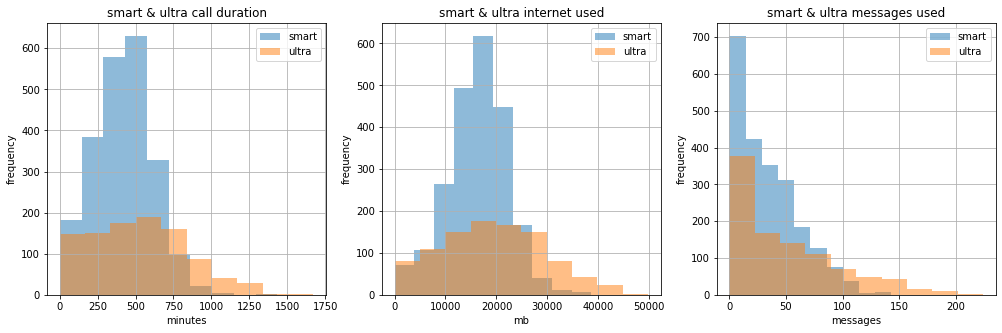

In [53]:
fig, axes = plt.subplots(ncols = 3, figsize = (17, 5))

axes[0].set_title('smart & ultra call duration')
axes[0].hist(data_used.query("tariff == 'smart'")['call_duration'], alpha=0.5)
axes[0].hist(data_used.query("tariff == 'ultra'")['call_duration'], alpha=0.5)
axes[0].grid()
axes[0].set_ylabel('frequency')
axes[0].set_xlabel('minutes')
axes[0].legend(labels = ['smart', 'ultra'])

axes[1].set_title('smart & ultra internet used')
axes[1].hist(data_used.query("tariff == 'smart'")['mb_used'], alpha=0.5)
axes[1].hist(data_used.query("tariff == 'ultra'")['mb_used'], alpha=0.5)
axes[1].grid()
axes[1].set_ylabel('frequency')
axes[1].set_xlabel('mb')
axes[1].legend(labels = ['smart', 'ultra'])

axes[2].set_title('smart & ultra messages used')
axes[2].hist(data_used.query("tariff == 'smart'")['message_used'], alpha=0.5)
axes[2].hist(data_used.query("tariff == 'ultra'")['message_used'], alpha=0.5)
axes[2].grid()
axes[2].set_ylabel('frequency')
axes[2].set_xlabel('messages')
axes[2].legend(labels = ['smart', 'ultra'])

-----------

***ВЫВОДЫ***

1. Минуты
 - **пользователи тарифа "Ультра" в среднем расходуют больше минут**, чем пользователи тарифа "Смарт" (527/418 мин). 
 - гистограмма подтверждает распределение: данные тарифа "Ультра" скошены вправо вместе с пиковым значением, разброс больше, чем у тарифа "Смарт" (> 1200 минут).
 
 
2. Интернет
 - **пользователи тарифа "Ультра" в среднем расходуют больше МБ интернета**, чем пользователи тарифа "Смарт" (19/16 ГБ).
 - **распределение использованных МБ интернета у пользователей тарифа "Ультра" более плавное.** Пиковые значения лежат в диапазоне от 20 до 50 МБ. У тарифа "Cмарт" овыраженный пик значения в 50МБ.
 
 
3. СМС
 - **пользователи тарифа "Ультра" в среднем расходуют больше СМС**, чем пользователи тарифа "Смарт" (49/33 сообщения). 
 - гистограмма подтверждает распределение: данные тарифа "Ультра" чуть больше скошены вправо вместе с пиковым значением, разброс больше, чем у тарифа "Смарт" (> 100 сообщений).

## ПРОВЕРКА ГИПОТЕЗ <a id="hypo"></a>

**1. Выручка пользователей "Ультра" и "Смарт"** <a id="hypo_1"></a>

Проверим гипотезу о том, что **средняя выручка пользователей тарифов «Ультра» и «Смарт» различается**. 

Сформулируем нулевую гипотезу: **средняя выручка пользователей тарифов "Смарт" и "Ультра" равна**

In [54]:
#сравним дисперсии выборок
np.var(data_used.query("tariff == 'smart'")['total_month_cost'])

673628.974426787

In [55]:
np.var(data_used.query("tariff == 'ultra'")['total_month_cost'])

143345.5641732588

In [56]:
#задаём критический уровень статистической зависимости
alpha = 0.05

#задаём переменные с выручкой по каждому тарифу
smart_value = data_used.query("tariff == 'smart'")['total_month_cost']
ultra_value = data_used.query("tariff == 'ultra'")['total_month_cost']

#проверяем гипотезу о равенстве средней выручки пользователей тарифов "Ультра" и "Смарт"
results = st.ttest_ind(smart_value, ultra_value, equal_var = False)

#выведем р-значение
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.7240946993530856e-246
Отвергаем нулевую гипотезу


ПРОВЕРИМ ГИПОТЕЗУ СРЕЗАМИ ДАННЫХ

In [57]:
data_used.query('tariff == "smart"')['total_month_cost'].mean()

1294.6393001345896

In [58]:
data_used.query('tariff == "ultra"')['total_month_cost'].mean()

2071.0659898477156

Вывод: **отвергаем нулевую гипотезу** о том, что средняя выручка пользователей тарифов "Смарт" и "Ультра" равна. **Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается**

----------------------------------------------------------------------------------------------

**2. Выручка пользователей из Москвы и других регионов** <a id="hypo_2"></a>

Проверим гипотезу о том, что **средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов**

Сформулируем нулевую гипотезу: **средняя выручка пользователей Москвы равна средней выручке пользователей из других регионов**

In [59]:
#сравним дисперсии выборок
np.var(data_used.loc[data_used['city'] == 'Москва', ['total_month_cost']])

total_month_cost    565256.379416
dtype: float64

In [60]:
np.var(data_used.loc[data_used['city'] != 'Москва', ['total_month_cost']])

total_month_cost    656514.284104
dtype: float64

In [64]:
#задаём критический уровень статистической зависимости
alpha = 0.05

#задаём переменные с выручкой по москве и другим регионам

moscow_value = data_used.loc[data_used['city'] == 'Москва', ['total_month_cost']]
other_value = data_used.loc[data_used['city'] != 'Москва', ['total_month_cost']]

#дисперсии
np.var(data_used.loc[data_used['city'] == 'Москва', ['total_month_cost']])

#уберем выбросы в значениях выручки
moscow_value = moscow_value.loc[(moscow_value['total_month_cost'] >= moscow_value['total_month_cost'].quantile(.05))&(
moscow_value['total_month_cost'] <= moscow_value['total_month_cost'].quantile(.95)), 'total_month_cost']

other_value = other_value.loc[(other_value['total_month_cost'] >= other_value['total_month_cost'].quantile(.05))&(
other_value['total_month_cost'] <= other_value['total_month_cost'].quantile(.95)), 'total_month_cost']

#проверяем гипотезу о равенстве средней выручки пользователей тарифов "Ультра" и "Смарт"
results = st.ttest_ind(moscow_value, other_value, equal_var = False)
#equal_var = False, так как дисперсии выборок разные

#выведем р-значение
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.23243668231806447
Не получилось отвергнуть нулевую гипотезу


Мы не можем овтергнуть нулевую гипотезу о том, что **средняя выручка пользователей Москвы равна средней выручке пользователей из других регионов**. 

ПРОВЕРИМ ГИПОТЕЗУ СРЕЗАМИ ДАННЫХ

In [62]:
data_used.query('city == "Москва"')['total_month_cost'].mean()

1550.8052373158755

In [63]:
data_used.query('city != "Москва"')['total_month_cost'].mean()

1528.3169419900116

Мы видим, что разница в выручке между регионами и Москвой минимальна, но есть. Скорее всего, в ходе расчётов не получилось отвергуть гипотезу, **так как мы задали недостаточно чувствительный критический уровень статистической зависимости.** 

---

## ВЫВОД <a id="sum"></a>

**Какой тариф лучше?**

Проанализировав наши данные можно сделать следующие выводы: 

- тариф "Смарт" приносит выручки больше, чем тариф "Ультра" (более чем в два раза)


- очевидно, что пользователи тарифа "Смарт" чаще пользователей тарифа "Ультра" выходят за рамки пакетов минут и смс (к интернету не относится)


- пользователи тарифа "Ультра" никогда не выходят за рамки предоставленного пакета услуг


- тариф "Смарт" чаще оказывается "тесным" для пользователя, чем тариф "Ультра", но таким образом он приносит бóльшее количество выручки компании "Мегалайн"

**РЕКОМЕНДАЦИИ ДЛЯ КОММЕРЧЕСКОГО ДЕПАРТАМЕНТА**

1. Тем пользователям тарифа "Смарт", чьи средние ежемесячные оплаты превышают 1950 рублей, рекомендовать перейти на тариф "Ультра". Это позволит:

     - повысить лояльность клиентов, так как теперь они не будут думать о том, что могут выйти за рамки лимитов выбранного тарифа
     - создать устойчивую прибыль, так как клиенты будут ежемесячно оплачивать бóльшую абонентскую плату
     
     
2. Предложить тариф "Оптимальный", где пользователь будет иметь возможность выбирать пакеты и размер услуг самостоятельно. Стоимость отдельных пакетов услуг должна несколько превышать среднюю стоимость ежемесячно оплачиваемых конкретным пользователем соответствующих услуг сверх лимита, чтобы принести компании дополнительную выручку, не потеряв при этом лояльность клиента. 